In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
import pandas as pd

In [ ]:
X = np.array([[5,3], [10,15], [15,12], [24,10], [30,45], [85,70], [71,80], [60,78], [55,52], [80,91],])


In [ ]:
kmeans = KMeans(n_clusters=2)  # k=2      0 , 1
kmeans.fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2)

In [ ]:
print(kmeans.cluster_centers_)

[[70.2 74.2]
 [16.8 17. ]]


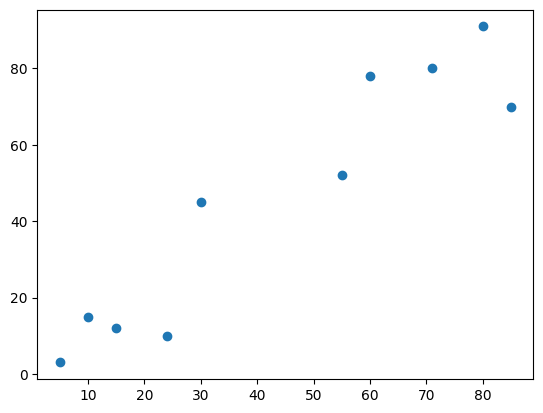

In [ ]:
plt.scatter(X[:,0],X[:,1], label='True Position')

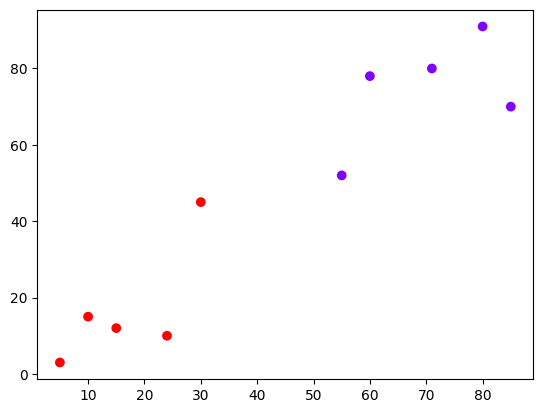

In [ ]:
plt.scatter(X[:,0],X[:,1], c=kmeans.labels_, cmap='rainbow')

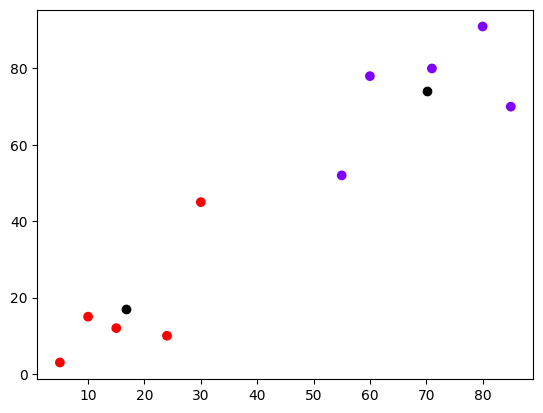

In [ ]:
plt.scatter(X[:,0], X[:,1], c=kmeans.labels_, cmap='rainbow') 
plt.scatter(kmeans.cluster_centers_[:,0] ,kmeans.cluster_centers_[:,1], color='black')

Customer **Segmentation**


In [31]:
#https://www.kaggle.com/datasets/vetrirah/customer?resource=download&select=Train.csv
df = pd.read_excel("Train.xlsx")
df.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


In [32]:
df = df.drop(["Segmentation", "ID"], axis="columns") #drop unnecessary columns

In [33]:
df.dropna(inplace=True)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6665 entries, 0 to 8067
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           6665 non-null   object 
 1   Ever_Married     6665 non-null   object 
 2   Age              6665 non-null   int64  
 3   Graduated        6665 non-null   object 
 4   Profession       6665 non-null   object 
 5   Work_Experience  6665 non-null   float64
 6   Spending_Score   6665 non-null   object 
 7   Family_Size      6665 non-null   float64
 8   Var_1            6665 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 520.7+ KB


In [35]:
df = df.reset_index()
df

,index,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,0,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4
1,2,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6
2,3,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6
3,5,Male,Yes,56,No,Artist,0.0,Average,2.0,Cat_6
4,6,Male,No,32,Yes,Healthcare,1.0,Low,3.0,Cat_6
...,...,...,...,...,...,...,...,...,...,...
6660,8062,Male,Yes,41,Yes,Artist,0.0,High,5.0,Cat_6
6661,8064,Male,No,35,No,Executive,3.0,Low,4.0,Cat_4
6662,8065,Female,No,33,Yes,Healthcare,1.0,Low,1.0,Cat_6
6663,8066,Female,No,27,Yes,Healthcare,1.0,Low,4.0,Cat_6


In [36]:
df = df.drop("index", axis="columns")
df.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4
1,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6
2,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6
3,Male,Yes,56,No,Artist,0.0,Average,2.0,Cat_6
4,Male,No,32,Yes,Healthcare,1.0,Low,3.0,Cat_6


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6665 entries, 0 to 6664
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           6665 non-null   object 
 1   Ever_Married     6665 non-null   object 
 2   Age              6665 non-null   int64  
 3   Graduated        6665 non-null   object 
 4   Profession       6665 non-null   object 
 5   Work_Experience  6665 non-null   float64
 6   Spending_Score   6665 non-null   object 
 7   Family_Size      6665 non-null   float64
 8   Var_1            6665 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 468.8+ KB


In [38]:
df_new = pd.get_dummies(df)
df_new.head()

,Age,Work_Experience,Family_Size,Gender_Female,Gender_Male,Ever_Married_No,Ever_Married_Yes,Graduated_No,Graduated_Yes,Profession_Artist,...,Spending_Score_Average,Spending_Score_High,Spending_Score_Low,Var_1_Cat_1,Var_1_Cat_2,Var_1_Cat_3,Var_1_Cat_4,Var_1_Cat_5,Var_1_Cat_6,Var_1_Cat_7
0,22,1.0,4.0,0,1,1,0,1,0,0,...,0,0,1,0,0,0,1,0,0,0
1,67,1.0,1.0,1,0,0,1,0,1,0,...,0,0,1,0,0,0,0,0,1,0
2,67,0.0,2.0,0,1,0,1,0,1,0,...,0,1,0,0,0,0,0,0,1,0
3,56,0.0,2.0,0,1,0,1,1,0,1,...,1,0,0,0,0,0,0,0,1,0
4,32,1.0,3.0,0,1,1,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0


In [48]:
df_kmeans = pd.get_dummies(df, drop_first=True) #to remove redundandant column
df_kmeans.head()

,Age,Work_Experience,Family_Size,Gender_Male,Ever_Married_Yes,Graduated_Yes,Profession_Doctor,Profession_Engineer,Profession_Entertainment,Profession_Executive,...,Profession_Lawyer,Profession_Marketing,Spending_Score_High,Spending_Score_Low,Var_1_Cat_2,Var_1_Cat_3,Var_1_Cat_4,Var_1_Cat_5,Var_1_Cat_6,Var_1_Cat_7
0,22,1.0,4.0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
1,67,1.0,1.0,0,1,1,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
2,67,0.0,2.0,1,1,1,0,0,0,0,...,1,0,1,0,0,0,0,0,1,0
3,56,0.0,2.0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,32,1.0,3.0,1,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [49]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_df_kmeans = scaler.fit_transform(df_kmeans)

In [50]:
from sklearn.cluster import KMeans
kmeans_model = KMeans(n_clusters=3)
clusters = kmeans_model.fit_predict(df_kmeans)
df_kmeans.insert(df_kmeans.columns.get_loc("Age"), "Cluster", clusters)
df_kmeans

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,Cluster,Age,Work_Experience,Family_Size,Gender_Male,Ever_Married_Yes,Graduated_Yes,Profession_Doctor,Profession_Engineer,Profession_Entertainment,...,Profession_Lawyer,Profession_Marketing,Spending_Score_High,Spending_Score_Low,Var_1_Cat_2,Var_1_Cat_3,Var_1_Cat_4,Var_1_Cat_5,Var_1_Cat_6,Var_1_Cat_7
0,2,22,1.0,4.0,1,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
1,1,67,1.0,1.0,0,1,1,0,1,0,...,0,0,0,1,0,0,0,0,1,0
2,1,67,0.0,2.0,1,1,1,0,0,0,...,1,0,1,0,0,0,0,0,1,0
3,0,56,0.0,2.0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,2,32,1.0,3.0,1,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6660,0,41,0.0,5.0,1,1,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
6661,2,35,3.0,4.0,1,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
6662,2,33,1.0,1.0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
6663,2,27,1.0,4.0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [ ]:
df_kmeans["Cluster"].value_counts()

0    2755
2    2647
1    1263
Name: Cluster, dtype: int64

In [ ]:
df_kmeans.Cluster.unique()

array([0, 1, 2], dtype=int32)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

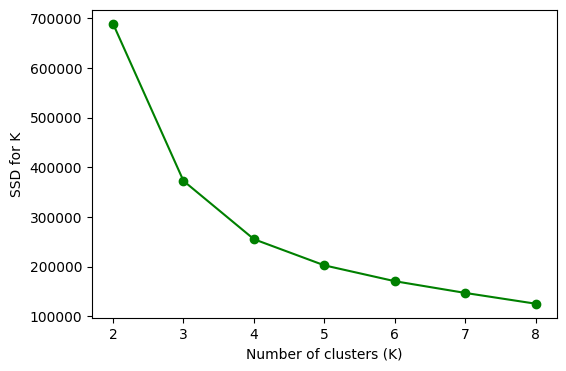

In [ ]:
ssd = [] #sum of squared distances (SSD)
for k in range(2, 9):
    kmeans_model = KMeans(n_clusters=k)
    kmeans_model.fit(df_kmeans)
    ssd.append(kmeans_model.inertia_)
plt.figure(figsize=(6, 4), dpi=100)
plt.plot(range(2, 9), ssd, color="green", marker="o")
plt.xlabel("Number of clusters (K)")
plt.ylabel("SSD for K")
plt.show()

The so-called elbow method is a common way to find the ideal number of clusters within a dataset.

It’s called elbow, because:

it takes the possible values of K that you choose,
for example, beginning from two clusters and going up to eight clusters the values for K would be: 2, 3, 4, 5, 6, 7, 8,calculates the sum of squared distances (SSD for short) for every value of K (=number of clusters),
SSD is the result of calculating in each cluster, how far the data points are from the cluster centroid, then adding up the results for all clusters; think of it as something that shows the variance of your data (fun fact: as the number of clusters increase, the SSD decreases),
creates a line plot where the x-axis contains the values that K can take on, and the y-axis shows the SSD (=variance) for each K (=number of clusters).

